# RUN PARCELS FOR MWB GULF STREAM SIMULATION

Alli Ho 08/24/2021

Using Jerry's code `parcels_regions.ipynb`

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import os
import time
import numpy as np
import xarray as xr
import utils

from pathlib import Path

from parcels_utils import xr_dataset_to_fieldset, HFRGrid
from constants import *

from parcels_sim import ParcelsSimulation, DeleteAfterLifetime
from parcels_analysis import *
from hycom_utils import HYCOMGrid

INFO: Compiled ParcelsRandom ==> /var/folders/m1/w9l6s0cs1rv7gj9k4t0cffj40000gn/T/parcels-501/libparcels_random_f313e3b9-1f31-4d15-a430-2244762cf3a5.so


# SET UP VARIABLES

Make sure current file name is correct, otherwise only need to change the initial drop time `tstart` and the number of timesteps you want to run the simulation `repeat_N` (default is once, for N>1 the interval is determined by `repeat_dt`)

In [6]:
currentname = 'HYCOM_forecast/hycom_mwbproj.nc'
projname = 'mwb_trajectories'
# lon0 = -81; lat0 = 24.25;
configname = "mwb.json"
spawnpointfile = '/Users/alliho/Documents/SIO/parcels_projects/parcels-westcoast-master/spawn_points_mats/seeds_keywest.mat';
tend = 'END'
repeat_dt = 10800;
simulation_dt = 300;
snapshot_interval = 3600;


# ADJUST FOR DESIRED FORECAST:
tstart = '2021-08-24T00:00';
repeat_N = 2

# Generate config file

In [7]:
domain = dict(
    S=22,
    N=45,
    W=273,
    E=295
)

lines = [
'{',
'    "name": "' + projname + '",',
'    "netcdf_path": "current_netcdfs/' + currentname + '",' ,
'    "resolution": 1,',
'    "parcels_config": {',
'        "time_range": ["' + tstart + '", "' + tend + '"],',
'        "repeat_dt": ' + str(repeat_dt) + ',',
'        "repetitions": ' + str(repeat_N) + ',',
# '        "spawn_points": [',
# '            [' + str(lat0) + ', ' + str(lon0) + ']',
# '            ],',
'        "spawn_points": "' + spawnpointfile + '",   ',
'        "simulation_dt": ' + str(simulation_dt) + ',',
'        "snapshot_interval": ' + str(snapshot_interval) + ',',
'        "save_snapshots": true,',
'        "shown_domain": {',
'            "S": ' + str(domain['S']) + ',',
'            "N": ' + str(domain['N']) + ',',
'            "W": ' + str(domain['W']) + ',',
'            "E": ' + str(domain['E']) + '',
'        }   }',
'}'    ,
]


with open(utils.PARCELS_CONFIGS_DIR / configname, 'w') as f:
    for line in lines:
        f.write(line)
        f.write('\n')
f.close()        
print("config file generated and saved to " + configname)

config file generated and saved to mwb.json


## RUN PARCELS

In [8]:
configs = [
    configname
]

loaded_configs = [utils.load_config(utils.PARCELS_CONFIGS_DIR / path) for path in configs]
grids = [HYCOMGrid(utils.FILES_ROOT / cfg["netcdf_path"]) for cfg in loaded_configs]
sims = []

range(len(loaded_configs))
for i in range(len(loaded_configs)):
    sim = ParcelsSimulation(loaded_configs[i]["name"], grids[i], loaded_configs[i]["parcels_config"])
#     sim.add_kernel(DeleteAfterLifetime)
    sims.append(sim)

Particle trajectories for mwb_trajectories will be saved to /Users/alliho/Documents/SIO/parcels_projects/parcels-westcoast-master/particledata/particle_mwb_trajectories.nc
    total particles in simulation: 98
No last interval exists.
Num snapshots to save for mwb_trajectories: 145


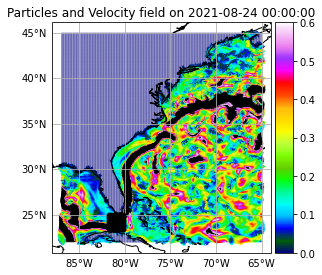

[None]

In [9]:
[sim.pset.show(field="vector", vmax=ParcelsSimulation.MAX_V) for sim in sims]

# RUN SIMULATION

In [10]:
for sim in sims:
    sim.execute()

INFO: Compiled ThreddsParticleAdvectionRK4AgeParticleDeleteOOB ==> /var/folders/m1/w9l6s0cs1rv7gj9k4t0cffj40000gn/T/parcels-501/2ab7922ba4ffe8f5b9892896fe69d82b_0.so
